In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats("svg")

C:\Users\Admin\AppData\Local\Temp\ipykernel_14112\2928744843.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats("svg")


In [18]:
data = pd.read_csv("mnist_train_small.csv", header=None)

In [19]:
data.shape

(20000, 785)

In [20]:
# extract labels (number ID's) and remove from data
labels = data.values[:, 0]  # Convert DataFrame to NumPy before slicing
data = data.values[:, 1:]

print(labels.shape)
print(data.shape)

(20000,)
(20000, 784)


In [21]:
labels

array([6, 5, 7, ..., 2, 9, 5], shape=(20000,))

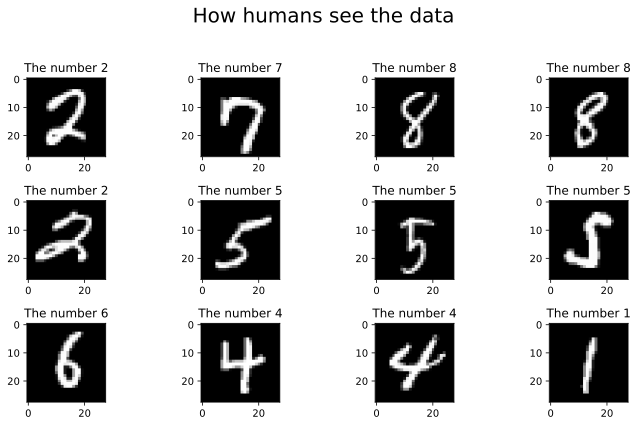

In [23]:
fig, axs = plt.subplots(3, 4, figsize = (10, 6))

for ax in axs.flatten():
    # pick a random image
    randimg2show = np.random.randint(0, high = data.shape[0])

    # create the image (must be reshaped!)
    img = np.reshape(data[randimg2show, :], (28, 28))
    ax.imshow(img, cmap = "gray")

    ax.set_title("The number %i" %labels[randimg2show])

plt.suptitle("How humans see the data", fontsize = 20)
plt.tight_layout(rect = [0, 0, 1,.95])
plt.show()

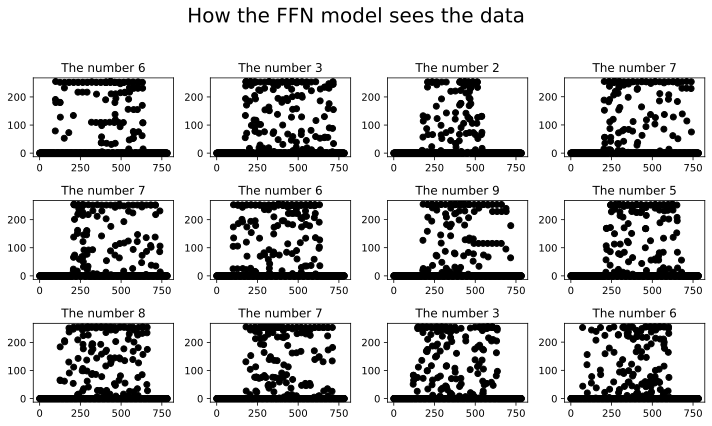

In [24]:
fig, axs = plt.subplots(3, 4, figsize = (10, 6))

for ax in axs.flatten():
    # pick a random image
    randimg2show = np.random.randint(0, high = data.shape[0])

    # create the image
    ax.plot(data[randimg2show, :], "ko")

    ax.set_title("The number %i" %labels[randimg2show])

plt.suptitle("How the FFN model sees the data", fontsize = 20)
plt.tight_layout(rect = [0, 0, 1,.95])
plt.show()

In [25]:
# y-axis -> pixel intensity values
# x-axis -> linearized index of images on x-axis

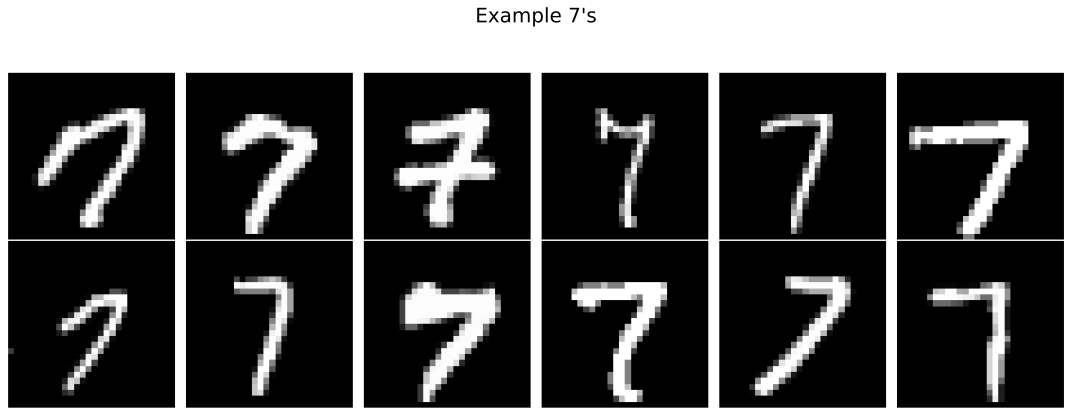

In [26]:
# let's see some exmaples 7s


# find indices of all 7's in the dataset
the7s = np.where(labels == 7)[0]

# draw the first 12
fig, axs = plt.subplots(2, 6, figsize = (15, 6))

for i, ax in enumerate(axs.flatten()):
    img = np.reshape(data[the7s[i], :], (28, 28))
    ax.imshow(img, cmap = "gray")
    ax.axis("off")

plt.suptitle("Example 7's", fontsize = 20)
plt.tight_layout(rect = [0, 0, 1, .95])
plt.show()

(2126, 784)


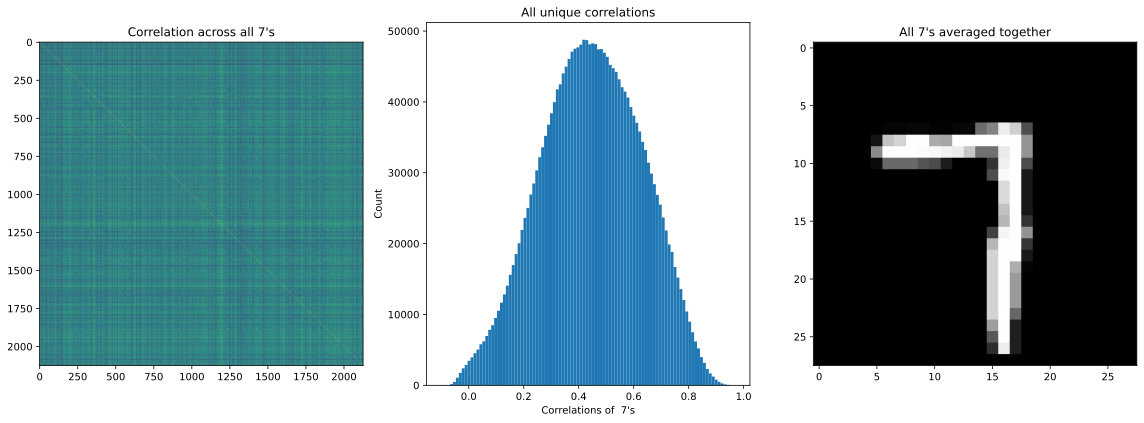

In [28]:
# how similar are all the 7's

# how many 7's are there
print(data[the7s, :].shape)

# let's see how they relate to each other by computing spacial correlations
C = np.corrcoef(data[the7s, :])

# and visualize
fig, ax = plt.subplots(1, 3, figsize = (16, 6))
ax[0].imshow(C, vmin = 0, vmax = 1)
ax[0].set_title("Correlation across all 7's")

# extract the unique correlations and show as a scatterplot
uniqueCs = np.triu(C, k = 1).flatten()
ax[1].hist(uniqueCs[uniqueCs != 0], bins = 100)
ax[1].set_title("All unique correlations")
ax[1].set_xlabel("Correlations of  7's")
ax[1].set_ylabel("Count")

# show all 7's together
aveAll7s = np.reshape(np.mean(data[the7s, :], axis = 0), (28, 28))
ax[2].imshow(img, cmap = "gray")
ax[2].set_title("All 7's averaged together")

plt.tight_layout()
plt.show()